# Notebook visualisation 

importer les libraries 

In [17]:

import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


Charger un fichier JSON

In [18]:
with open("C:\\Users\\noara\\OneDrive\\Documents\\INGE2\\ProjetIA\\data\\c_gls_WL_202410131829_0000000113387_ALTI_V2.2.0.json") as f:
    fulljson = json.load(f)

retourne un dictionnaire de size 4 data géometry proprieties et type 

on passe la key data (liste de dictionnaire)  en dataframe avec laquelle on pourra travailler 


In [19]:
df=pd.DataFrame(fulljson["data"]) 

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   identifier                                                 52 non-null     object 
 1   time                                                       52 non-null     float64
 2   datetime                                                   52 non-null     object 
 3   orthometric_height_of_water_surface_at_reference_position  52 non-null     float64
 4   associated_uncertainty                                     52 non-null     float64
 5   satellite                                                  52 non-null     object 
 6   ground-track_number                                        52 non-null     int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 3.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   identifier                                                 52 non-null     int32         
 1   time                                                       52 non-null     float64       
 2   datetime                                                   52 non-null     datetime64[ns]
 3   orthometric_height_of_water_surface_at_reference_position  52 non-null     float64       
 4   associated_uncertainty                                     52 non-null     float64       
 5   satellite                                                  52 non-null     int32         
 6   ground-track_number                                        52 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int3

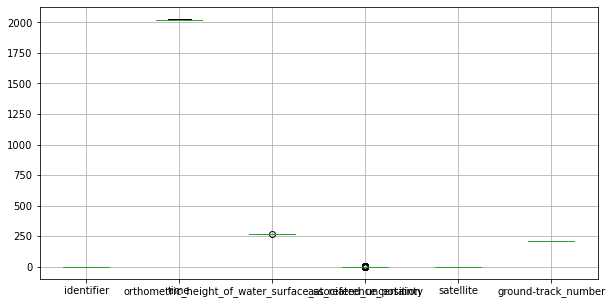

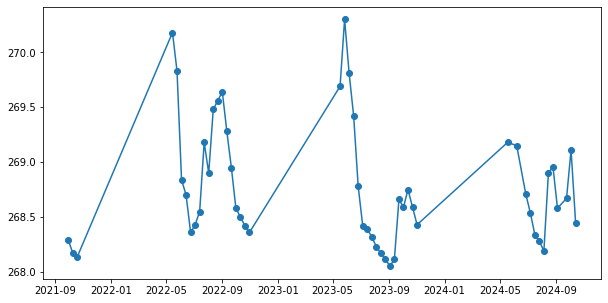

In [21]:
df["datetime"] = pd.to_datetime(df["datetime"], format="%Y/%m/%d %H:%M")
categorical_colums = df.select_dtypes(include = ['object']).columns.tolist()

def label_encode_columns(data, columns):
    for col in columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])        
    return data
df = label_encode_columns(df, categorical_colums)

print('apres traitement', df.info()) 
plt.figure(figsize=(10, 5))
df.boxplot()

plt.figure(figsize=(10, 5))  # Définir la taille du graphique
plt.plot(df["datetime"], df["orthometric_height_of_water_surface_at_reference_position"], marker="o")
